## Python 3

In this workshop, we'll look at
1. Vectorised calculations
2. Loops


## Vectorised calculations

**Vectorised calculations** refer to calculations performed on vectors, rather than on individual elements. Often they are faster as the computer can treat the entire vector at once, rather than repeatedly doing calculations. Some examples:

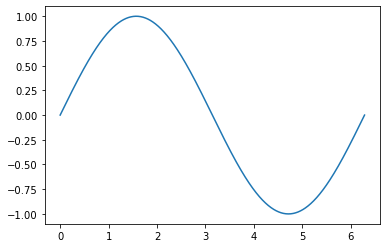

In [4]:
import numpy as np
import matplotlib.pylab as plt
 
x = np.linspace(0, 2* np.pi, 1000)
y = np.sin(x)  #This is vectorised calculation, as we pass the entire vector at once.
plt.figure()
plt.plot(x,y)

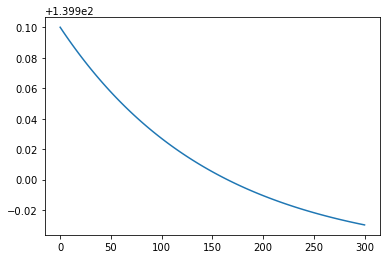

In [5]:
times = np.linspace(0,300,100)
subsidence = 140 + 0.15 * (np.exp(-times/150) - 1)  #this is also a vectorised calculation, taken from inverse theory, week 3.
plt.figure()
plt.plot(times, subsidence)

### Operations on arrays

Last week, you were asked to calculate operations on columns of an array:

In [7]:
data = np.loadtxt('stress.dat')
time = data[:,0]
comp_stress_x = data[:,1]
comp_stress_y = data[:,2]
comp_stress_z = data[:,3]
shear_stress_x = data[:,4]
shear_stress_y = data[:,5]
shear_stress_z = data[:,6]

print('Stresses: mean, std:')
print( comp_stress_x.mean(), comp_stress_x.std() )
print( comp_stress_y.mean(), comp_stress_y.std() )
print( comp_stress_z.mean(), comp_stress_z.std() )
print( shear_stress_x.mean(), shear_stress_x.std() )
print( shear_stress_y.mean(), shear_stress_y.std() )
print( shear_stress_z.mean(), shear_stress_z.std() )


Stresses: mean, std:
-137.81787425 5.722073196660188
-138.91235425 4.121978802196457
-138.159896 4.02178484595882
-0.0168585 3.1999669307631526
0.10767925000000002 2.192465318167984
-0.11403424999999999 2.9544545311405517


In [14]:
stripped_data = data[:,1:]
means = stripped_data.mean(axis = 0)   #axis = 0 means column-wise
print(means)

[-1.37817874e+02 -1.38912354e+02 -1.38159896e+02 -1.68585000e-02
  1.07679250e-01 -1.14034250e-01]


In [13]:
print(  data[:,1:].mean(axis = 0) )  #or all in one line

[-1.37817874e+02 -1.38912354e+02 -1.38159896e+02 -1.68585000e-02
  1.07679250e-01 -1.14034250e-01]


In [15]:
print(  data[:,1:].mean(axis = 1) )  #axis = 1 means row-wise

[-67.16033333 -67.0995     -67.2155     ... -68.6635     -68.60433333
 -68.70816667]


In [18]:
print(  data[:,1:].mean()  )  #defaults to "flattening array" into a vector, then returning the (single) mean value.


-69.152223


In [19]:
help (np.mean)

Help on function mean in module numpy:

mean(a, axis=None, dtype=None, out=None, keepdims=<no value>)
    Compute the arithmetic mean along the specified axis.
    
    Returns the average of the array elements.  The average is taken over
    the flattened array by default, otherwise over the specified axis.
    `float64` intermediate and return values are used for integer inputs.
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose mean is desired. If `a` is not an
        array, a conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the means are computed. The default is to
        compute the mean of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a mean is performed over multiple axes,
        instead of a single axis or all the axes as before.
    dtype : data-type, optional
        Type to use in computing the mean.  For integer inputs,

### Loops

In [22]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [24]:
for i in np.arange(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [36]:
for i in range(4):
    print('Hello')

Hello
Hello
Hello
Hello


In [26]:
my_list = [0,1,2,3]
for j in my_list:
    print(j)

0
1
2
3


In [34]:
noise = np.zeros(6)
import random
for j in range( len(noise)):
    noise[j] = random.normalvariate(0,1)
print(noise)

[-1.53817618 -1.08302843 -1.55667639  0.7657568  -0.96232853 -0.71153906]


In [35]:
noise = np.zeros(6)
sd = np.array([1,2,3,4,5,6])
import random
for j in range( len(noise)):
    noise[j] = random.normalvariate(0,sd[j])
print(noise)


[ 1.16453876 -0.53457448 -1.62804865 -4.84218738 -2.72389195  5.3817513 ]


In [63]:
# Adding up the square numbers: 5^2, 6^2, .... 10^2
numbers = np.arange(5,11)
print(numbers)

# Two ways: sum a vector
total = numbers**2
print( total.sum() )

# or count using a loop
total = 0 
for i in range(5,11):
    total = total + i**2
print(total)

[ 5  6  7  8  9 10]
355
355


### Shorthand for accumulation

In [61]:
total = 0 
for i in range(11):
    total +=  i**2  # is shorthand for total = total + i**2
print(total)

385


### Nested loops

In [ ]:
Sometimes its helpful to nest loops inside each other.

In [46]:
A = np.array( [[1,2],[3,4]])
print(A)

print( A. shape )

[[1 2]
 [3 4]]
(2, 2)


In [47]:
for i in range(A.shape[0]):
    for j in range(A.shape[1]):   #need a different loop variable (or index) here. You can't use 'i' twice.
        print(A[i,j])    #indent twice.

1
2
3
4


In [ ]:
for i in range(2):  #This the same, but not as generalisable. If we change the size of A, it will not work as expected.
    for j in range(2):
        print(A[i,j])

## Tasks

0. Using a vectorised calculation, display to the screen the column-wise maximum values of the rightmost 3 data-columns of the file stress.dat.

1. Here, we will calculate sin(x) where x is a vector, using a loop. 
    1. Using np.linspace, define the vector x of length 10 over the interval $[0,2\pi]$. 
    2. Using np.zeros, define a vector y of zeros, of length 10.
    3. **Using a loop**, take each element x[i] of x at a time, calculate  sin(x[i]), and store it in the corresponding position of y.
    4. After the loop is complete, display y to the screen.
    5. Check that you get the same answer when vectorising, using    print( np.sin(x))
    

2. Using a for-loop, calculate the sum
$$ T = 10^3 + 11^3 + 12^3 +...+ 30^3$$

3. The natural logarithm of 2 (in Python: np.log(2)) is given by the infinite series
$$ 1 - \frac{1}{2} + \frac{1}{3} - \frac{1}{4} + ....$$
    1. Write a for-loop to evaluate this series to 10 terms. Note that the ith term is (-1)**i/(i+1), for i = 0,1,2,3
    2. Display the error to the screen (the difference of your calculated value and the correct value)
    3. How many terms do you need to compute the value correct to $10^{-3}$?

4. The trapezium rule to integrate a 1D function over an interval discretises the domain by $N$ equally spaced values of $x$ : $x_1, x_2, ....x_N$. The formula for the area is then
$$ A = \frac{h}{2} \big[ f(x_1) + f(x_N) +  2f(x_2) + 2f(x_3) + ... + 2f(x_{N-1})\big]$$
where h is the (equal) spacing between the $x$ values.

Based on the trapezium rule, create a function that calcuates the integral of $\sin(x)$ over the range $[0, \pi]$, using a for-loop. You can add the end points explicitly, but loop over the inner values.  The function should take as argument N, and return an estimate of the integral.

Using another for-loop, calculate the error (of your function, compared to the analytic value of 2) as a function of N.
Make a plot of your results.

5. Create a plot of stacked circles
    1. By specifying the angle theta to range from 0 to 2*Pi, create (x,y)
positions on the unit circle: 
$$ x = \cos(\theta); y = \sin(\theta). $$
Plot a single circle on a figure of unit radius. Use plt.figure( figsize=(6,6))
 to create a square shaped figure.
    2. Create a function that plots a circle, given the (x_0,y_0) position of the
centre point and the radius, r. Make sure it works, by creating a figure, then calling your function.
    3. Using a for-loop, call your function 5 times to plot 5 circles, each
one sitting on top of the one below as if they were stacked
vertically.
    4. Using a for-loop, call your function to plot 10 co-centred circles which have radii 1, 0.7, 0.7^2, 0.7^3,….
   